**Vücut Performans Verisi**

*multi class classification*

**Veri Seti Hakkında**

Bu veri kümesi, yaşla birlikte performans derecesini ve bazı egzersiz performansı verilerini doğrulayan verilerdir.

(13393, 12)

age : 20 ~ 64

gender : cinsiyet(M,F)

height_cm : uzunluk

weight_kg : kilo

body fat_% : vücut yağ oranı

diyastolik : diyastolik kan basıncı (dk) küçük tansiyon

sistolik : sistolik kan basıncı (dk) yüksek tansiyon

gripForce : tutma gücü

sit and bend forward_cm : oturup öne eğilme

sit-ups counts : mekik sayıları

broad jump_cm : geniş atlama

class : A,B,C,D (A: en iyi)

Kaynak
(Kore Spor Teşvik Vakfı) ,kaggle

# İmporting required libraries

In [ ]:
!pip install catboost

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format',  '{:.2f}'.format)

In [ ]:
df = pd.read_csv("bodyPerformance.csv")
df_copy = df.copy()
df_copy.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.00,M,172.30,75.24,21.30,80.00,130.00,54.90,18.40,60.00,217.00,C
1,25.00,M,165.00,55.80,15.70,77.00,126.00,36.40,16.30,53.00,229.00,A
2,31.00,M,179.60,78.00,20.10,92.00,152.00,44.80,12.00,49.00,181.00,C
3,32.00,M,174.50,71.10,18.40,76.00,147.00,41.40,15.20,53.00,219.00,B
4,28.00,M,173.80,67.70,17.10,70.00,127.00,43.50,27.10,45.00,217.00,B


# Keşifçi Veri Analizi (Exploratory Data Analysis — EDA)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [ ]:
print(f'Shape     : {df_copy.shape}\n'
      f'Size      : {df_copy.size}\n'
      f'Dimension : {df_copy.ndim}')

Shape     : (13393, 12)
Size      : 160716
Dimension : 2


In [ ]:
df_copy.isnull().sum()

age                        0
gender                     0
height_cm                  0
weight_kg                  0
body fat_%                 0
diastolic                  0
systolic                   0
gripForce                  0
sit and bend forward_cm    0
sit-ups counts             0
broad jump_cm              0
class                      0
dtype: int64

In [ ]:
df_copy.duplicated().sum()

1

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
8965,27.00,F,157.00,49.10,30.70,70.00,86.00,27.70,19.70,51.00,167.00,A
12473,27.00,F,157.00,49.10,30.70,70.00,86.00,27.70,19.70,51.00,167.00,A


In [ ]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13393.00,36.78,13.63,21.00,25.00,32.00,48.00,64.00
height_cm,13393.00,168.56,8.43,125.00,162.40,169.20,174.80,193.80
weight_kg,13393.00,67.45,11.95,26.30,58.20,67.40,75.30,138.10
body fat_%,13393.00,23.24,7.26,3.00,18.00,22.80,28.00,78.40
diastolic,13393.00,78.80,10.74,0.00,71.00,79.00,86.00,156.20
systolic,13393.00,130.23,14.71,0.00,120.00,130.00,141.00,201.00
gripForce,13393.00,36.96,10.62,0.00,27.50,37.90,45.20,70.50
sit and bend forward_cm,13393.00,15.21,8.46,-25.00,10.90,16.20,20.70,213.00
sit-ups counts,13393.00,39.77,14.28,0.00,30.00,41.00,50.00,80.00
broad jump_cm,13393.00,190.13,39.87,0.00,162.00,193.00,221.00,303.00


In [ ]:
df.nunique()

age                          44
gender                        2
height_cm                   467
weight_kg                  1398
body fat_%                  527
diastolic                    89
systolic                    102
gripForce                   550
sit and bend forward_cm     528
sit-ups counts               81
broad jump_cm               245
class                         4
dtype: int64

In [ ]:
column_names = {'body fat_%': 'body_fat_%', 'sit and bend forward_cm': 'sit_and_bend_forward_cm',"sit-ups counts":"sit-ups_counts","broad jump_cm":"broad_jump_cm"}

df_copy.rename(columns=column_names, inplace=True)

In [ ]:
cat_cols = ["gender","class"]
num_cols = ["age","height_cm","weight_kg","body_fat_%","diastolic","systolic","gripForce","sit_and_bend_forward_cm","sit-ups_counts","broad_jump_cm"]

In [ ]:
df.head(5)

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.00,M,172.30,75.24,21.30,80.00,130.00,54.90,18.40,60.00,217.00,C
1,25.00,M,165.00,55.80,15.70,77.00,126.00,36.40,16.30,53.00,229.00,A
2,31.00,M,179.60,78.00,20.10,92.00,152.00,44.80,12.00,49.00,181.00,C
3,32.00,M,174.50,71.10,18.40,76.00,147.00,41.40,15.20,53.00,219.00,B
4,28.00,M,173.80,67.70,17.10,70.00,127.00,43.50,27.10,45.00,217.00,B


# Visualization-Görselleştirme

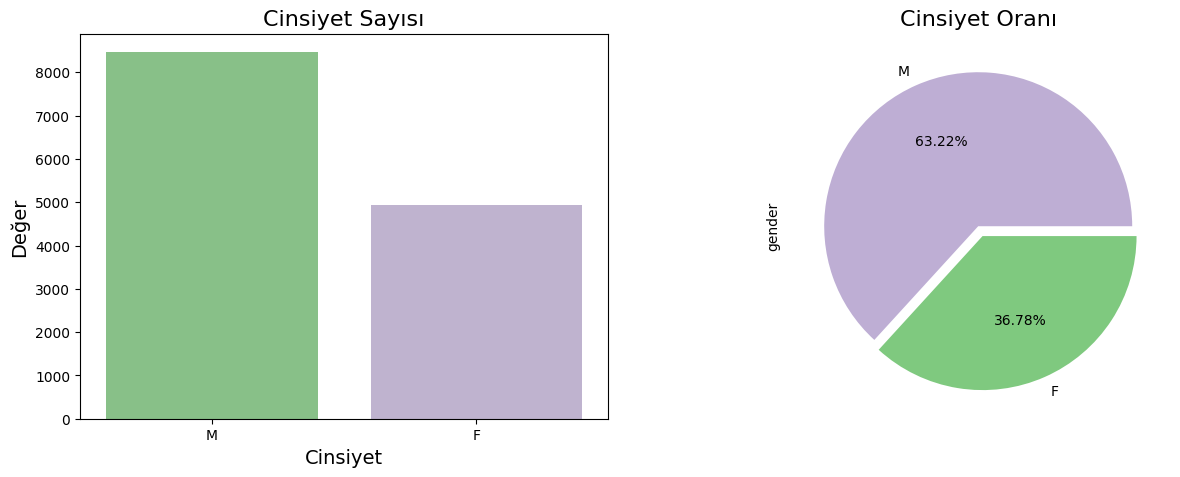

In [ ]:
palette_color = sns.color_palette('Accent')

fig, axs = plt.subplots(1,2, figsize = (15, 5))
ax = sns.countplot(data=df_copy,
                   x=df_copy['gender'],
                   ax = axs[0],
                   palette='Accent');

ax.set_xlabel('Cinsiyet', fontsize=14)
ax.set_ylabel('Değer', fontsize=14)
axs[0].set_title("Cinsiyet Sayısı", fontsize=16)

ax2 = df_copy['gender'].value_counts().plot.pie(explode=[0,0.07],
                                             colors=[palette_color[1], palette_color[0]],
                                             ax = axs[1],
                                             autopct='%.2f%%');
axs[1].set_title("Cinsiyet Oranı", fontsize=16);

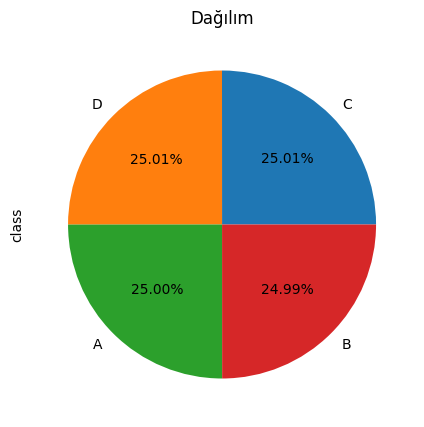

In [ ]:
ax = df_copy['class'].value_counts().plot.pie(autopct='%.2f%%',
                                              figsize=(15, 5))
ax.set_title('Dağılım');

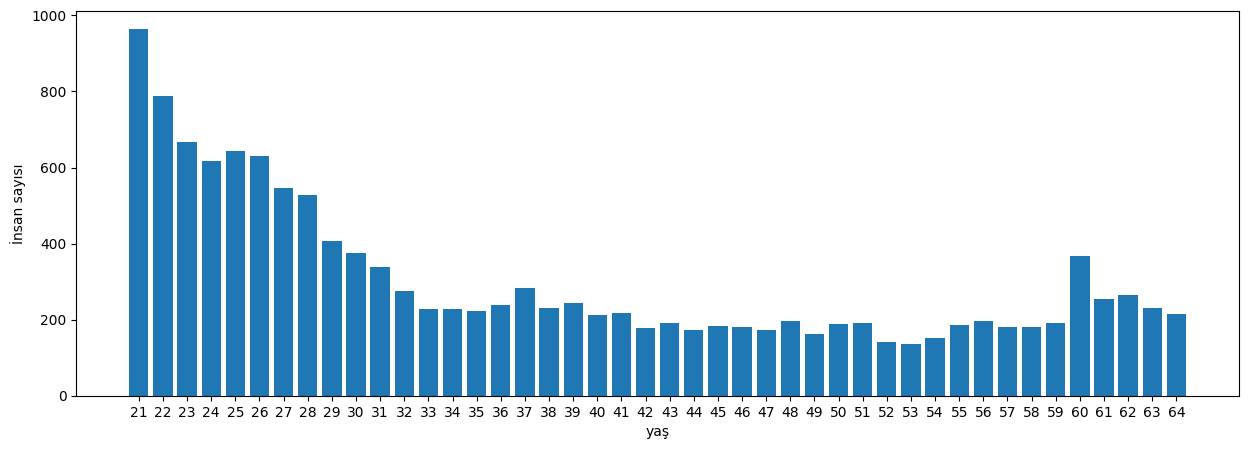

In [ ]:
bodyfat_count = df['age'].value_counts()
plt.figure(figsize=(15,5))
plt.bar(bodyfat_count.index, bodyfat_count.values)
plt.title('')
plt.xlabel('yaş')
plt.ylabel('İnsan sayısı')
plt.xticks(bodyfat_count.index)
plt.show()

Text(0, 0.5, 'insan sayıları')

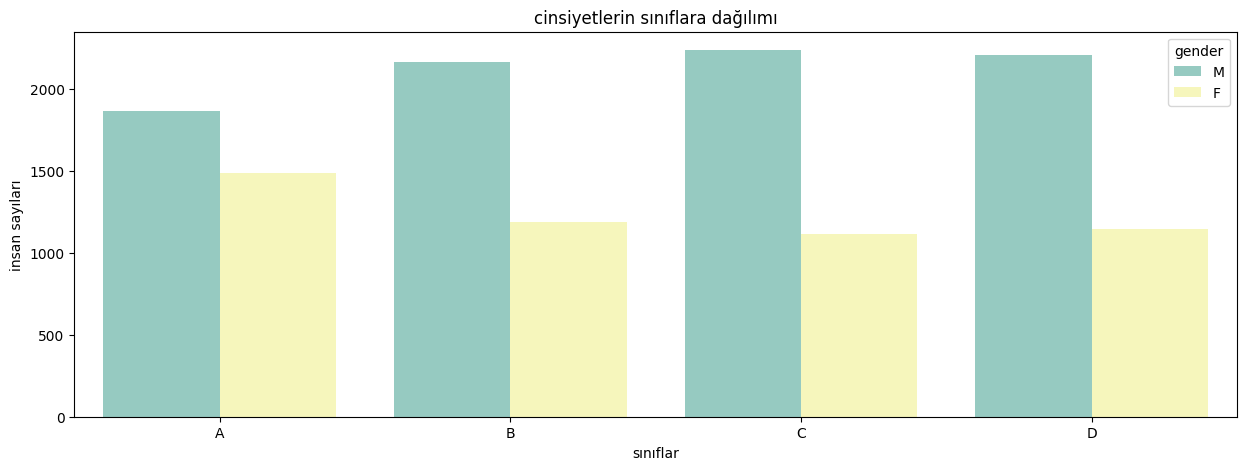

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_copy, x='class', hue='gender', palette="Set3",order=sorted(df_copy['class'].unique()))
plt.title('cinsiyetlerin sınıflara dağılımı');
plt.xlabel('sınıflar')
plt.ylabel('insan sayıları')


<ipython-input-17-1bd880687dcf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


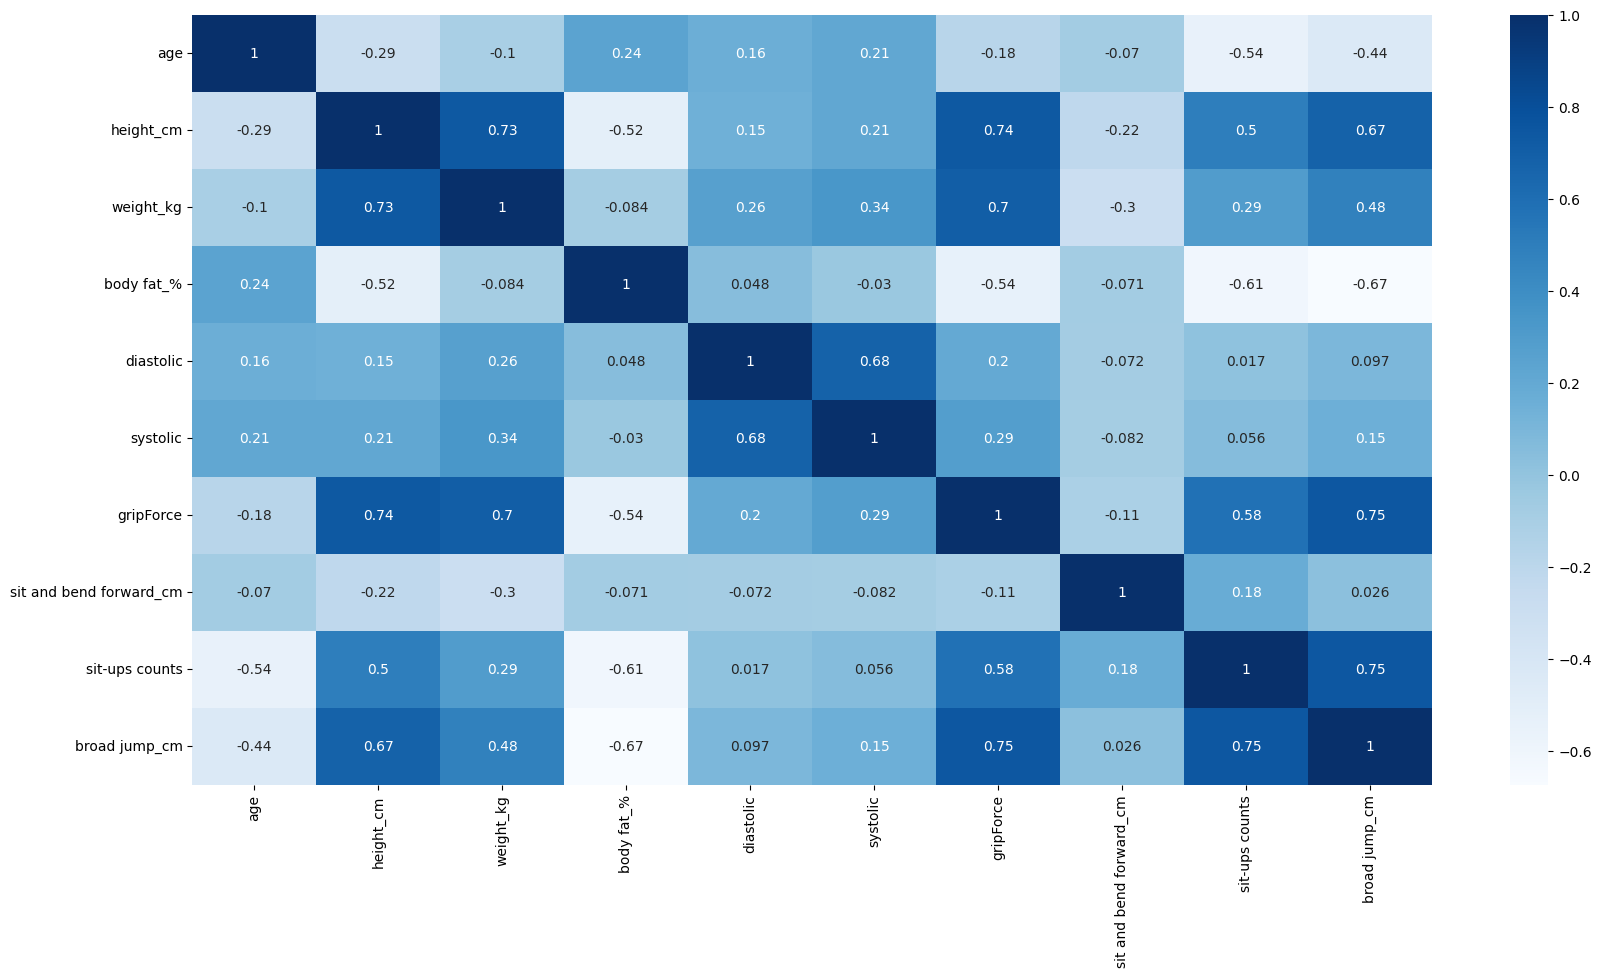

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, cmap="Blues", annot=True);

# Feature Engineering

In [ ]:
print(pd.concat([df_copy.isnull().sum(), df_copy.isnull().sum()/len(df_copy)*100],
                 keys=['Number of Missing Values', 'Ratio of Missing Values'],
                 axis=1))

                         Number of Missing Values  Ratio of Missing Values
age                                             0                     0.00
gender                                          0                     0.00
height_cm                                       0                     0.00
weight_kg                                       0                     0.00
body_fat_%                                      0                     0.00
diastolic                                       0                     0.00
systolic                                        0                     0.00
gripForce                                       0                     0.00
sit_and_bend_forward_cm                         0                     0.00
sit-ups_counts                                  0                     0.00
broad_jump_cm                                   0                     0.00
class                                           0                     0.00


In [ ]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    Q1 = df[col_name].quantile(low_quantile)
    Q3 = df[col_name].quantile(up_quantile)
    IQR = Q3 - Q1
    low_limit = Q1 - 1.5 * IQR
    up_limit = Q3 + 1.5 * IQR
    return low_limit, up_limit

In [ ]:
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(df_copy, col))

age False
height_cm True
weight_kg True
body_fat_% True
diastolic True
systolic True
gripForce True
sit_and_bend_forward_cm True
sit-ups_counts False
broad_jump_cm True


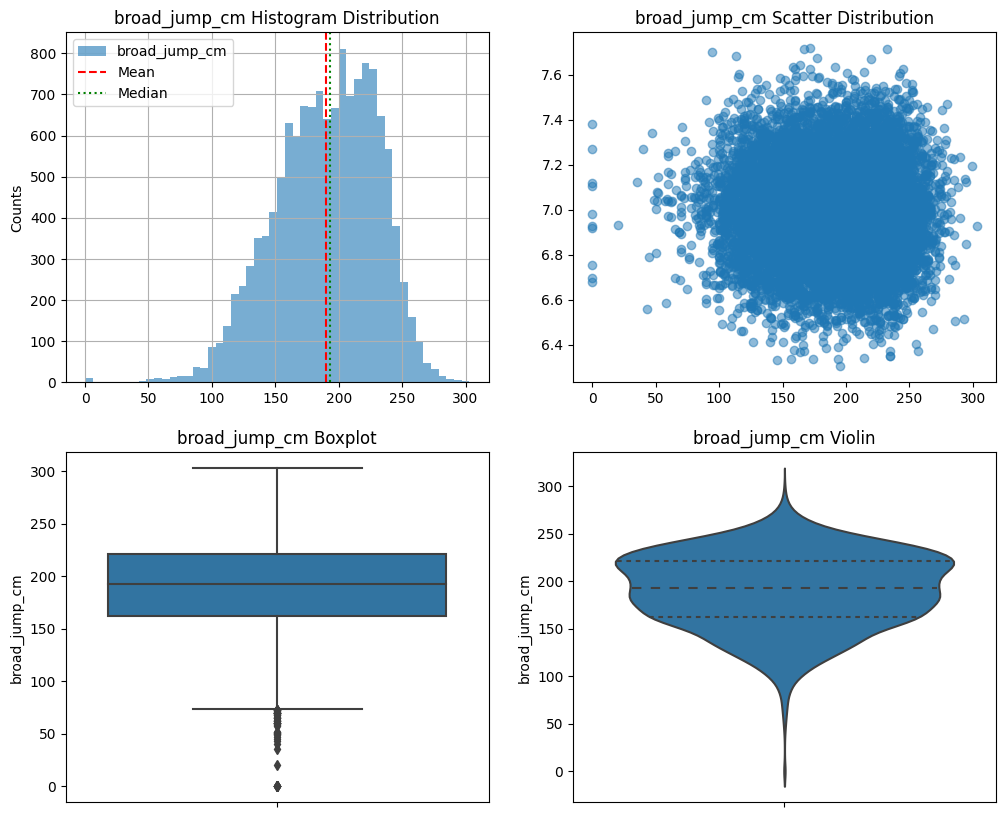

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['broad_jump_cm'].hist(bins=50, label='broad_jump_cm', alpha=0.6)
plt.axvline(np.mean(df_copy['broad_jump_cm']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['broad_jump_cm']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("broad_jump_cm Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['broad_jump_cm'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("broad_jump_cm Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="broad_jump_cm", data=df_copy)
plt.title("broad_jump_cm Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="broad_jump_cm", data=df_copy, inner="quartile", bw=0.2)
plt.title("broad_jump_cm Violin");

In [ ]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    print(col, replace_with_thresholds(df_copy, col))

age None
height_cm None
weight_kg None
body_fat_% None
diastolic None
systolic None
gripForce None
sit_and_bend_forward_cm None
sit-ups_counts None
broad_jump_cm None


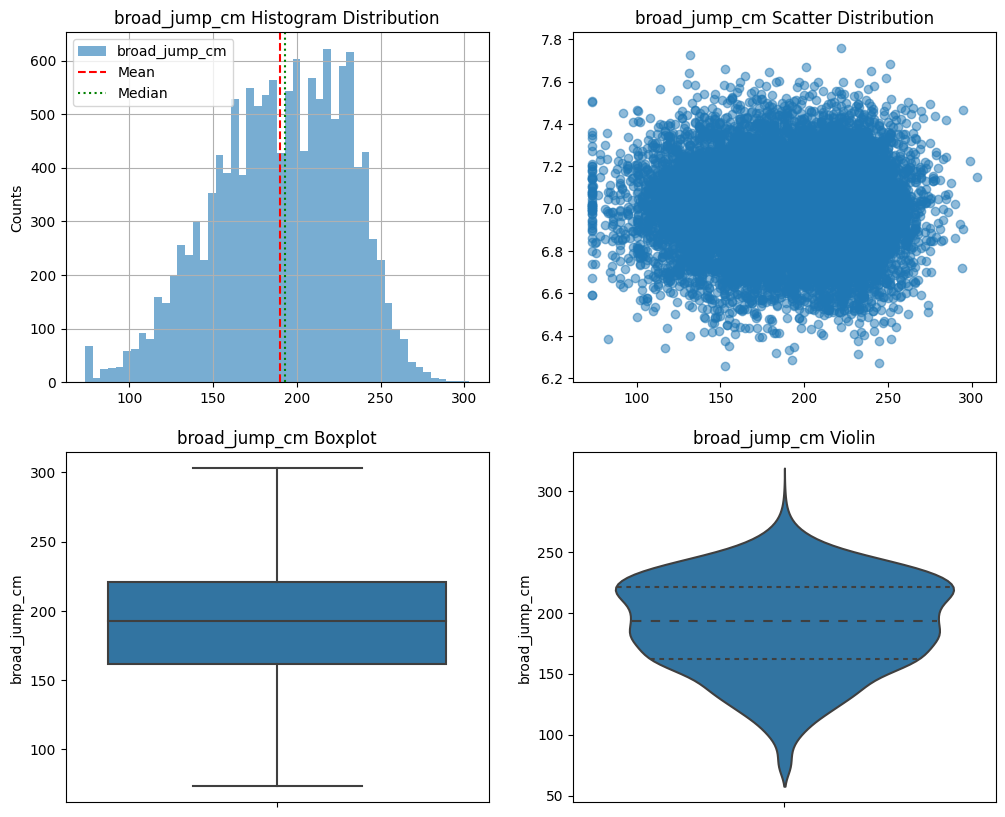

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
df_copy['broad_jump_cm'].hist(bins=50, label='broad_jump_cm', alpha=0.6)
plt.axvline(np.mean(df_copy['broad_jump_cm']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df_copy['broad_jump_cm']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("broad_jump_cm Histogram Distribution");
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df_copy['broad_jump_cm'], np.random.normal(7, 0.2, size=df_copy.shape[0]), alpha=0.5)
plt.title("broad_jump_cm Scatter Distribution");

plt.subplot(2, 2, 3)
sns.boxplot(y="broad_jump_cm", data=df_copy)
plt.title("broad_jump_cm Boxplot");

plt.subplot(2, 2, 4)
sns.violinplot(y="broad_jump_cm", data=df_copy, inner="quartile", bw=0.2)
plt.title("broad_jump_cm Violin");

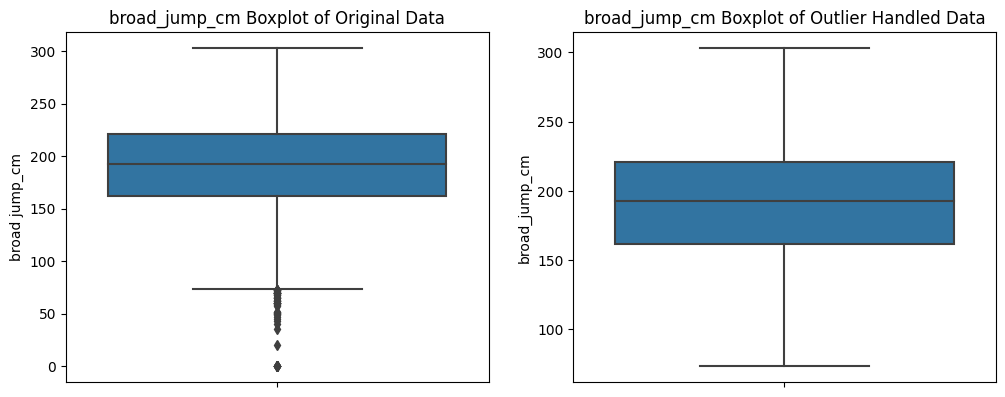

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.boxplot(y="broad jump_cm", data=df)
plt.title("broad_jump_cm Boxplot of Original Data");

plt.subplot(2, 2, 2)
sns.boxplot(y="broad_jump_cm", data=df_copy)
plt.title("broad_jump_cm Boxplot of Outlier Handled Data");

In [ ]:
df_copy.head(10)

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm,class
0,27.00,M,172.30,75.24,21.30,80.00,130.00,54.90,18.40,60.00,217.00,C
1,25.00,M,165.00,55.80,15.70,77.00,126.00,36.40,16.30,53.00,229.00,A
2,31.00,M,179.60,78.00,20.10,92.00,152.00,44.80,12.00,49.00,181.00,C
3,32.00,M,174.50,71.10,18.40,76.00,147.00,41.40,15.20,53.00,219.00,B
4,28.00,M,173.80,67.70,17.10,70.00,127.00,43.50,27.10,45.00,217.00,B
5,36.00,F,165.40,55.40,22.00,64.00,119.00,23.80,21.00,27.00,153.00,B
6,42.00,F,164.50,63.70,32.20,72.00,135.00,22.70,0.80,18.00,146.00,D
7,33.00,M,174.90,77.20,36.90,84.00,137.00,45.90,12.30,42.00,234.00,B
8,54.00,M,166.80,67.50,27.60,85.00,165.00,40.40,18.60,34.00,148.00,C
9,28.00,M,185.00,84.60,14.40,81.00,156.00,57.90,12.10,55.00,213.00,B


In [ ]:
scaler = StandardScaler()
df_copy[num_cols] = scaler.fit_transform(df_copy[num_cols])

In [ ]:
# gender sütununda 1 olanlar M, 0 olanlar F
# class kısmında A, B, C, D = 0, 1, 2, 3
le = LabelEncoder()
df_copy[cat_cols] = df_copy[cat_cols].apply(le.fit_transform)
df_copy.head(10)

,age,gender,height_cm,weight_kg,body_fat_%,diastolic,systolic,gripForce,sit_and_bend_forward_cm,sit-ups_counts,broad_jump_cm,class
0,-0.72,1,0.44,0.66,-0.27,0.11,-0.02,1.69,0.40,1.42,0.68,2
1,-0.86,1,-0.42,-0.98,-1.05,-0.17,-0.29,-0.05,0.12,0.93,0.98,0
2,-0.42,1,1.31,0.90,-0.43,1.24,1.49,0.74,-0.43,0.65,-0.23,2
3,-0.35,1,0.71,0.31,-0.67,-0.26,1.15,0.42,-0.02,0.93,0.73,1
4,-0.64,1,0.62,0.02,-0.85,-0.83,-0.22,0.62,1.53,0.37,0.68,1
5,-0.06,0,-0.38,-1.02,-0.17,-1.39,-0.77,-1.24,0.74,-0.89,-0.94,1
6,0.38,0,-0.48,-0.31,1.25,-0.64,0.33,-1.34,-1.89,-1.53,-1.12,3
7,-0.28,1,0.75,0.83,1.90,0.49,0.46,0.84,-0.40,0.16,1.11,1
8,1.26,1,-0.21,0.01,0.61,0.58,2.39,0.32,0.42,-0.40,-1.07,2
9,-0.64,1,1.95,1.46,-1.23,0.21,1.77,1.97,-0.42,1.07,0.58,1


# Model Training

In [ ]:
y = df_copy["class"]
X = df_copy.drop("class", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print('Shape of x_train is {}'.format(X_train.shape))
print('Shape of x_test is {}'.format(X_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (10714, 11)
Shape of x_test is (2679, 11)
Shape of y_train is (10714,)
Shape of y_test is (2679,)


In [ ]:
models = [
    ('LogisticRegression', LogisticRegression(random_state=17, solver='lbfgs', max_iter=3000)),
    ('DecisionTree', DecisionTreeClassifier(random_state=17)),
    ('RandomForest', RandomForestClassifier(random_state=17)),
    ('XGB', XGBClassifier(random_state=17, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(random_state=17, verbose=-1)),
    ('CatBoost', CatBoostClassifier(random_state=17, verbose=False)),
    ('NaiveBayes', GaussianNB()),
    ('KNN', KNeighborsClassifier()),
    ('GBM', GradientBoostingClassifier(random_state=17))
]

In [ ]:
for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc_ovr', 'precision_macro', 'recall_macro'])
    print(f'########## {name} ##########')
    print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
    print(f'Auc: {round(cv_results["test_roc_auc_ovr"].mean(), 4)}')
    print(f'Recall: {round(cv_results["test_recall_macro"].mean(), 4)}')
    print(f'Precision: {round(cv_results["test_precision_macro"].mean(), 4)}')
    print(f'F1: {round(cv_results["test_f1_macro"].mean(), 4)}')
svm = SVC(probability=True)
cv_results = cross_validate(svm, X, y, cv=10, scoring=['accuracy', 'f1_macro', 'roc_auc_ovr_weighted', 'precision_macro', 'recall_macro'])
print('########## SVM ##########')
print(f'Accuracy: {round(cv_results["test_accuracy"].mean(), 4)}')
print(f'Auc: {round(cv_results["test_roc_auc_ovr_weighted"].mean(), 4)}')
print(f'Recall: {round(cv_results["test_recall_macro"].mean(), 4)}')
print(f'Precision: {round(cv_results["test_precision_macro"].mean(), 4)}')
print(f'F1: {round(cv_results["test_f1_macro"].mean(), 4)}')

########## LogisticRegression ##########
Accuracy: 0.6169
Auc: 0.8528
Recall: 0.6169
Precision: 0.6142
F1: 0.6151
########## DecisionTree ##########
Accuracy: 0.6472
Auc: 0.7648
Recall: 0.6472
Precision: 0.6476
F1: 0.6472
########## RandomForest ##########
Accuracy: 0.7401
Auc: 0.917
Recall: 0.7401
Precision: 0.7446
F1: 0.7399
########## XGB ##########
Accuracy: 0.7552
Auc: 0.9226
Recall: 0.7552
Precision: 0.7597
F1: 0.7549
########## LightGBM ##########
Accuracy: 0.7607
Auc: 0.9262
Recall: 0.7607
Precision: 0.7668
F1: 0.7604
########## CatBoost ##########
Accuracy: 0.7404
Auc: 0.9194
Recall: 0.7404
Precision: 0.7448
F1: 0.7405
########## NaiveBayes ##########
Accuracy: 0.5551
Auc: 0.804
Recall: 0.5551
Precision: 0.5449
F1: 0.5459
########## KNN ##########
Accuracy: 0.6002
Auc: 0.823
Recall: 0.6002
Precision: 0.6231
F1: 0.601
########## GBM ##########
Accuracy: 0.7273
Auc: 0.9097
Recall: 0.7273
Precision: 0.7347
F1: 0.7269
########## SVM ##########
Accuracy: 0.6945
Auc: 0.8949
Recall: 

In [ ]:
models = [
    ('lr', LogisticRegression(), {'C': [0.1, 1, 10]}),
    ('dt', DecisionTreeClassifier(), {'max_depth': [5, 10, 15]}),
    ('rf', RandomForestClassifier(), {'n_estimators': [50, 100, 150]}),
    ('xgb', XGBClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('lgbm', LGBMClassifier(verbose=0), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('cat', CatBoostClassifier(verbose=0), {'iterations': [50, 100, 150], 'learning_rate': [0.01, 0.1]}),
    ('svm', SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    ('nb', GaussianNB(), {}),
    ('knn', KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    ('gbm', GradientBoostingClassifier(), {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1]})
]

# Her modeli tek tek dene, hiperparametre optimizasyonu yap ve performansını ölç
for name, model, params in models:
    gs = GridSearchCV(model, params)
    gs.fit(X_train, y_train)
    score = gs.score(X_test, y_test)
    print(f'{name}: {score}, best params: {gs.best_params_}')

lr: 0.610675625233296, best params: {'C': 0.1}
dt: 0.6916759985069055, best params: {'max_depth': 10}
rf: 0.7491601343784995, best params: {'n_estimators': 150}
xgb: 0.7648376259798432, best params: {'learning_rate': 0.1, 'n_estimators': 150}
lgbm: 0.765210899589399, best params: {'learning_rate': 0.1, 'n_estimators': 150}
cat: 0.7409481149682717, best params: {'iterations': 150, 'learning_rate': 0.1}
svm: 0.7170586039567003, best params: {'C': 10, 'kernel': 'rbf'}
nb: 0.5595371407241508, best params: {}
knn: 0.6147816349384099, best params: {'n_neighbors': 7}
gbm: 0.7368421052631579, best params: {'learning_rate': 0.1, 'n_estimators': 150}
